In [1]:
from arc import *
import numpy as np
import matplotlib.pyplot as plt

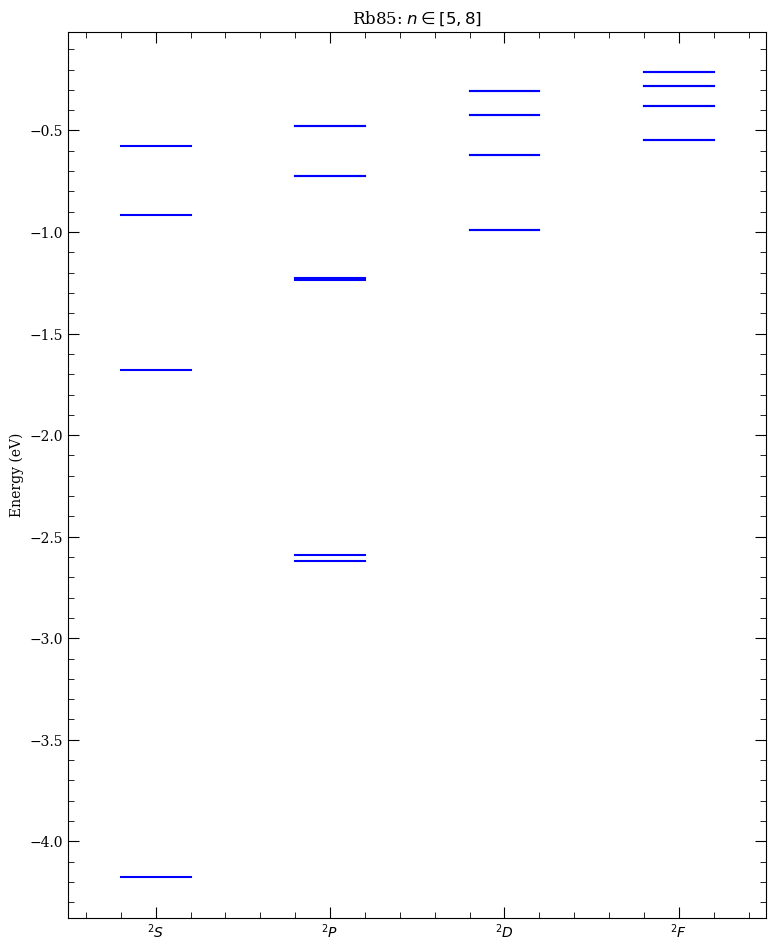

In [2]:
# 画Rb85的能级图

atom = Rubidium85()

nmin = 5  # Minimum n
nmax = 8  # Maximum n
lmin = 0  # Minimum l
lmax = 3  # Maxmium l

# Plot Energy Levels of Rubidium
levels = LevelPlot(atom)
levels.makeLevels(nmin, nmax, lmin, lmax)
levels.drawLevels()
levels.showPlot()
# plot is interactive when called outside the IPython notebook (e.g. from Python program)

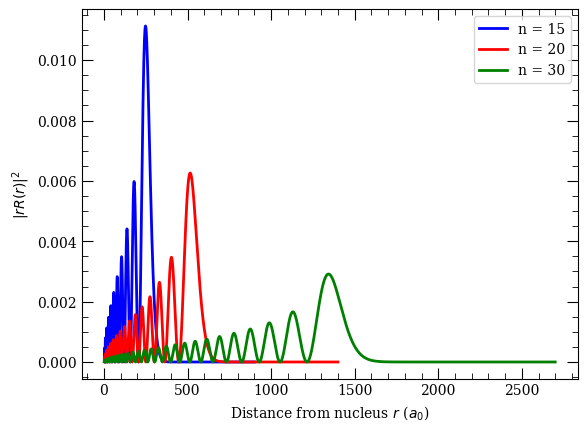

In [5]:
# 画波函数，这个是Rb85的n=15, 20, 30的

atom = Rubidium85()
pqn = [15, 20, 30]  # principal quantum numbers of the states
colors = ["b", "r", "g"]
l = 0  # S state
j = 0.5  # J = 1/2

plotLegend = []
for i in range(len(pqn)):
    n = pqn[i]
    step = 0.001
    a1, b1 = atom.radialWavefunction(
        l,
        0.5,
        j,
        atom.getEnergy(n, l, j) / 27.211,
        atom.alphaC ** (1 / 3.0),
        2.0 * n * (n + 15.0),
        step,
    )
    (legendInfo,) = plt.plot(
        a1, (b1) * (b1), "-", lw=2, color=colors[i], label=("n = %d" % n)
    )
    plotLegend.append(legendInfo)

plt.legend(handles=plotLegend)
plt.xlabel(r"Distance from nucleus $r$ ($a_0$)")
plt.ylabel(r"$\vert rR(r)\vert^2$")
plt.savefig('n=100 l=99 wavefunction')
plt.show()

In [4]:
# 计算Rb85的里德堡态的radiative lifetime，没考虑黑体辐射的那种，
# 也就是0K时的lifetime，毕竟冷原子也就这么个温度，不用考虑黑体辐射

atom = Rubidium85()
print("%.2e s" % (atom.getStateLifetime(100, 99, 99.5)))
# 这是n = 100, l = 99, j = 99.5的lifetime

9.25e-01 s


In [17]:
# 计算激发Rydberg excitation所需的激光波长
# 算出来的lambda是波长，omega/2pi是相应的频率，omega=2*pi*f，就是激光的频率


atom = Rubidium85()
# 这个是5P_{1/2} -> 90S_{1/2}的，即474所需的频率
print("Rb Excitation 5P_{1/2} -> 90S_{1/2}")
n1 = 5
l1 = 1
j1 = 0.5
# 以上为Initial State
n2 = 90
l2 = 0
j2 = 0.5
# 以上为Final State
print(
    "lambda = %.3f nm"
    % (atom.getTransitionWavelength(n1, l1, j1, n2, l2, j2) * 1e9)
)
print(
    "omega/2pi = %.3f GHz"
    % (atom.getTransitionFrequency(n1, l1, j1, n2, l2, j2) * 1e-9)
)

# 这个是5S_{1/2} -> 90P_{3/2}的，即一步激发所需的波长和频率
print("Rb Excitation 5S_{1/2} -> 90P_{3/2}")
n1 = 5
l1 = 0
j1 = 0.5
# 以上为Initial State
n2 = 90
l2 = 1
j2 = 1.5
# 以上为Final State
print(
    "lambda = %.3f nm"
    % (atom.getTransitionWavelength(n1, l1, j1, n2, l2, j2) * 1e9)
)
print(
    "omega/2pi = %.3f THz"
    % (atom.getTransitionFrequency(n1, l1, j1, n2, l2, j2) * 1e-12)
)

Rb Excitation 5P_{1/2} -> 90S_{1/2}
lambda = 473.994 nm
omega/2pi = 632481.316 GHz
Rb Excitation 5S_{1/2} -> 90P_{3/2}
lambda = 296.944 nm
omega/2pi = 1009.594 THz


In [11]:
# 计算相应跃迁的Rabi frequency
# 这是计算了两个，795和474的那两个transition的Rabi frequency

atom = Rubidium85()

# Laser Parameters 这个是795的
wp = 20.0e-6  # 20 um
Pp = 10e-9  # 10 nW

# 初态为5S_{1/2}
n1 = 5;
l1 = 0;
j1 = 0.5;
mj1 = 0.5;

# 末态为5P_{1/2} (795nm的D1 transition)
n2 = 5;
l2 = 1;
j2 = 0.5;
mj2 = 0.5;

# q 为 light polarisation (q = +1 为 sigma+)
qp = 0;
# Light Polarisation (sigma+)

rabiFreq = atom.getRabiFrequency(n1, l1, j1, mj1, n2, l2, j2, qp, Pp, wp)
print("Rabi Frequency = 2 pi x %.2f MHz" % (rabiFreq / (2 * np.pi) * 1e-6))



# Laser Parameters 这个是474的
wc = 15.0e-6  # 15 mu m
Pc = 300.0e-3  # 300 mW

# 初态为5P_{1/2}
n1 = 5;
l1 = 1;
j1 = 0.5;
mj1 = 0.5;

# 末态为90S_{1/2} (474nm)
n2 = 90;
l2 = 0;
j2 = 0.5;
mj2 = 0.5;

# q 为 light polarisation (q = +1 为 sigma+)
qc = 0;
# Light Polarisation (sigma+)

rabiFreq = atom.getRabiFrequency(n1, l1, j1, mj1, n2, l2, j2, qc, Pc, wc)
print("Rabi Frequency = 2 pi x %.2f MHz" % (rabiFreq / (2 * np.pi) * 1e-6))

Rabi Frequency = 2 pi x 2.42 MHz
Rabi Frequency = 2 pi x 19.00 MHz


In [23]:
# Calculate the two-photon Rabi frequency (the transition starts from the ground state and thus the parameters donnot 
# include the information of the ground state)

Delta = -200*1e6
TwoPhotonRabiFreq = atom.twoPhotonRydbergExcitation(Pp, wp, qp, Pc, wc, qc, Delta, 2, 0, 5, 1, 0.5, 90, 0, 0.5, 0.5)

print("two-photon Rabi frequency = 2 pi x %.2f MHz" % (TwoPhotonRabiFreq[0] / (2 * np.pi) * 1e-6))


# AlkaliAtom.twoPhotonRydbergExcitation(Pp, wp, qp, Pc, wc, qc, Delta, fg, mfg, ne, le, je, nr, lr, jr, mjr)

# Pp – power (W) of probe laser 
# wp – beam waist (m) of probe laser 
# qp – polarisation (+1, 0 or -1 corresponding to driving sigma+, pi, sigma-) of probe laser
# Pc – power (W) of coupling laser 
# wc – beam waist (m) of coupling laser 
# qc – polarisation of coupling laser 
# Delta – Detuning from excited state centre of mass (rad/s) # I think this unit rad/s means Delta = 2*pi*something, already include 2*pi
# fg – ground state hyperfine state
# mfg – projection of ground state hyperfine state
# ne – principal quantum numbers of excited state
# le – orbital angular momentum of excited state
# je – total angular momentum of excited state
# nr – principal quantum number of target Rydberg state
# lr – orbital angular momentum of target Rydberg state
# jr – total angular momentum of target Rydberg state
# mjr – projection of total angular momenutm of target Rydberg state

two-photon Rabi frequency = 2 pi x 0.09 MHz


In [2]:
# # 这段代码我电脑上的python环境运行不了，不知道怎么回事
# # 解决方法： 用anaconda新建一个环境，然后直接装ARC （pip install ARC-Alkali-Rydberg-Calculator）
# # 装ARC的时候他会自动把需要的相关的包都装上，比如numpy啥的，自动装的numpy的版本是1.24.4
# # 然后在新的环境下运行这段代码就能跑得动了


# from arc import *
# import numpy as np
# import matplotlib.pyplot as plt

# laserLinewidth = 2*np.pi*0.1e-3  # the unit is in GHz, where 0.1e-3 means 0.1 MHz
# nList = np.arange(90,95)
# c6List = []
# blockadeRadiusList = []
# for n in nList:
#     calculation1 = PairStateInteractions(
#         Rubidium(), n, 0, 0.5, n, 0, 0.5, 0.5, 0.5
#     )
#     state = printStateString(n, 0, 0.5) + " m_j= 1/2"
#     c6 = calculation1.getC6perturbatively(0, 0, 5, 35e9)
#     blockade = (abs(c6 / laserLinewidth)) ** (1 / 6.0)
#     print("C_6 [%s] = %.0f GHz (mu m)^6\t%.1f mu m" % (state, c6, blockade))
#     c6List.append(c6)
#     blockadeRadiusList.append(blockade)

AttributeError: module 'numpy' has no attribute 'int'